<a href="https://colab.research.google.com/github/okatic/demo-website1/blob/master/PM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #mount your g drive
import pandas as pd
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from pandas.tools.plotting import andrews_curves

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



##Load CSVs



In [0]:
path = "/content/drive/My\ Drive/Colab\ Notebooks/pm_analysis/" #change path to a folder on your g drive where you have stored the two csv files like /content/drive/My\ Drive/folder_containing_files


!ls $path 
!pwd


DH_Data_Challenge.xlsx
/content


In [0]:
file_path = "/content/drive/My Drive/Colab Notebooks/pm_analysis/"  #change path to a folder on your g drive where you have stored the two csv files like /content/drive/My\ Drive/folder_containing_files/
xls = pd.ExcelFile(file_path+'DH_Data_Challenge.xlsx' )
df1 = pd.read_excel(xls, 'User Data')
df2 = pd.read_excel(xls, 'Week Total Purchases')




In [0]:
df1.rename(index=str, columns={"user_id": "userid"},inplace=True)
df1

,userid,cohort,has_first_name,has_last_name,has_verfied_email,has_phone
0,1101,c,False,True,False,False
1,1105,a,True,True,False,True
2,1109,c,True,True,True,False
3,1118,a,True,False,False,False
4,1135,c,True,True,True,False
5,1149,a,False,True,True,False
6,1151,a,False,True,False,False
7,1154,c,False,True,False,True
8,1162,a,True,True,False,False
9,1164,a,True,True,False,False


In [0]:
df2


,userid,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,week 11,week 12,week 13,week 14,week 15
0,1101,0,0,4,1,1,0,0,2,0,0,0,1,0,0,1
1,1105,6,5,3,4,4,2,0,0,1,0,3,3,0,0,1
2,1109,0,0,4,3,4,0,1,1,0,0,1,0,0,0,0
3,1118,0,2,3,5,0,0,0,2,1,0,3,3,0,0,0
4,1135,0,0,4,3,0,3,0,1,0,2,0,1,0,1,2
5,1149,0,4,1,1,0,4,2,0,2,2,0,0,0,0,0
6,1151,2,5,3,4,1,1,0,3,0,1,3,3,0,0,0
7,1154,2,0,5,0,0,0,1,2,2,2,0,0,1,2,0
8,1162,0,0,2,5,0,0,0,2,0,1,0,1,0,3,3
9,1164,5,0,3,5,0,0,0,1,0,0,0,0,0,2,0


#2.1 On average, cohort B bought the most toners  - on average 29



,total,cohort,has_first_name_pct,has_last_name_pct,has_verfied_email_pct,has_phone_pct,avg_per_cust
a,7761,396,0.608586,0.838384,0.482323,0.310606,19.598485
b,7961,278,0.651079,0.866906,0.956835,0.305755,28.636691
c,6315,434,0.624424,0.861751,0.283410,0.251152,14.550691


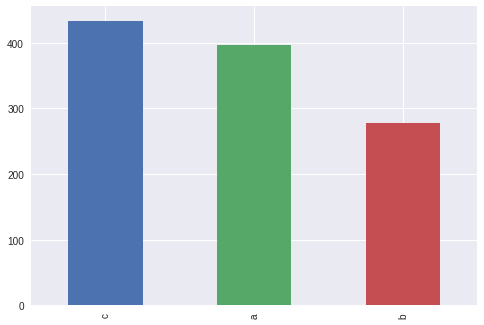

In [0]:
joined =pd.merge(df1, df2, on='userid', how='outer')
cols = list(joined)


sales_cols =  [k for k in cols if 'week' in k]
info_col = [k for k in cols if 'has' in k]

joined['total'] = joined[sales_cols].sum(1)


value_counts = joined['cohort'].value_counts()

value_counts.plot(kind="bar")

grouped_joined = joined.groupby('cohort').sum()



grouped_joined = pd.concat((grouped_joined, value_counts), axis=1).drop(['userid'],axis=1)


for i in info_col:
  grouped_joined[i+'_pct'] = grouped_joined[i]/grouped_joined['cohort']

  
  

  
summary = grouped_joined.iloc[:, -6:]

summary['avg_per_cust'] = summary['total']/summary['cohort']

summary




In [0]:
grouped_joined

#2.2 intereting patterns

cohort b was significantly better performing than the other two cohorts for verfied email
seems to .correlate with them also having highest purchase


In [0]:
grp = grouped_joined.rename(index=str, columns={"index": "cohort_id","cohort":"cohort_size"})


grp.rename(columns=lambda x: x.replace('week ', ''), inplace=True)



In [0]:
cols =  [str(i) for i in range(1,16)] 

tgrp = grp[cols]



In [0]:
trans_grp = tgrp.T

,a,b,c
1,799,241,641
2,666,288,600
3,670,381,584
4,934,838,801
5,521,427,517
6,463,419,387
7,318,555,328
8,629,964,472
9,408,530,288
10,366,568,273


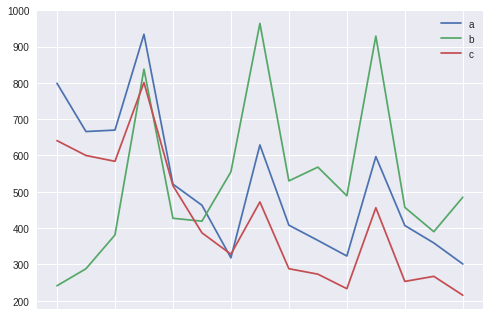

In [0]:
trans_grp.plot()
trans_grp

In [0]:
from bokeh.plotting import figure, show, output_file

from bokeh.io import output_notebook, show
output_notebook()

from bokeh.palettes import Spectral11


# prepare some data
x = trans_grp.index.values
a = trans_grp['a'].values 
b = trans_grp['b'].values 
c = trans_grp['c'].values 



# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_range=[100, 1000], title="cohort toner sales",
   x_axis_label='week #', y_axis_label="toner sales"
)

# add some renderers
p.line(x, a, legend="a", line_width=3,line_color=Spectral11[7])


p.line(x, b, legend="b", line_width=3)

p.line(x, c, legend="c", line_width=3,line_color=Spectral11[6])

# show the results
show(p)
output_notebook()

Loading BokehJS ...

Loading BokehJS ...

**Factor in relative cohort sizes**

In [0]:
from bokeh.plotting import figure, show, output_file

from bokeh.io import output_notebook, show
output_notebook()

from bokeh.palettes import Spectral11


# prepare some data/ dividing by number of people in each cohort to get average customer order
x = trans_grp.index.values
a = trans_grp['a'].values /value_counts['a']
b = trans_grp['b'].values /value_counts['b']
c = trans_grp['c'].values /value_counts['c']



# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_range=[0, 10], title="cohort toner sales",
   x_axis_label='week #', y_axis_label="average toner sales per customer"
)

# add some renderers
p.line(x, a, legend="a", line_width=3,line_color=Spectral11[7])


p.line(x, b, legend="b", line_width=3)

p.line(x, c, legend="c", line_width=3,line_color=Spectral11[6])

# show the results
show(p)
output_notebook()

Loading BokehJS ...

Loading BokehJS ...

Cohort b was significantly better performance than the other two cohorts for verfied email, this seems to correlate with them also having highest average purchase

It seems that they buy on 4 weekly cycles from peaks in graph